In [183]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, e, sin, cos, pi, inf
from scipy.linalg import eigh

Используя уравнение Шредингера, найти связные состояния и соответствующие им собственные значения в случае прямоугольной потенциальной ямы:

$
V(x) = \begin{cases}
   -U,  |x| < a \\
   0, |x| > a
\end{cases}
$

In [184]:
h = 6.62607015e-34 # Дж * с
h_bar = h / (2*pi)

U = 1e-18
m = 9.109e-31    
a = 1.8e-9
x_min = -a
x_max = a
x_pit_min = -a/3
x_pit_max = a/3
N = 2000

Гамильтониан

$$ -\frac{\hbar}{2m}\frac{d^2}{dx^2} + U $$

Аппроксимация второй производной

<tex>$${{d^2f}\over{dx^2}} \approx {f(x - dx) - 2f(x) + {f(x + dx)}\over{dx^2}}$$<tex>

In [185]:
# Создание сетки значений координаты
xs = np.linspace(x_min, x_max, N)

# Вычисление расстояния между узлами сетки
dx = xs[1] - xs[0]

# Гамильтониан
H = np.zeros((N, N))
c = -(h_bar**2)/(2*m*(dx**2))
for i in range(N):
    x = xs[i]
    u = 0 if x < x_pit_min or x > x_pit_max else -U
    H[i][i] = c*(-2) + u
    if i > 0:
        H[i][i-1] = c
    if i < N - 1:
        H[i][i+1] = c

E1: -9.672593947295072e-19
E2: -8.695669322621518e-19
E3: -7.087518963383688e-19
E4: -4.890160202996579e-19


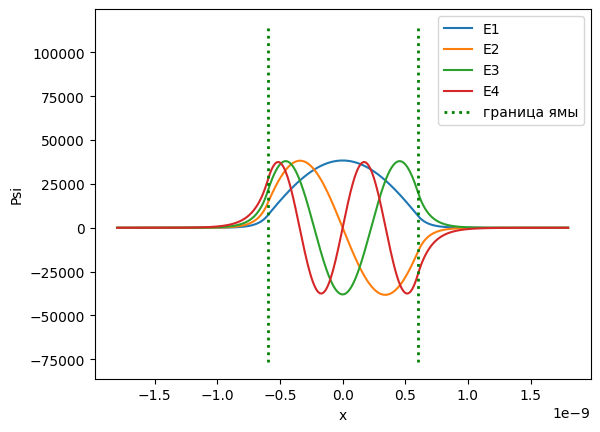

In [186]:
# Вычисление собственных значений и собственных векторов оператора Гамильтона
eigenvalues, eigenvectors = eigh(H)

psi_min, psi_max = inf, -inf
for i in range(4):
    # Нормализуем пси функцию
    psi_values = eigenvectors[:, i]
    psi_values = psi_values / (np.square(psi_values).sum() * dx)**(1/2)
    psi_min = min(psi_values.min(), psi_min)
    psi_max = max(psi_values.max(), psi_max)

    plt.plot(xs, psi_values, label=f'E{i+1}')
    print(f'E{i+1}: {eigenvalues[i]}')

plt.vlines(x=x_pit_min, ymin=psi_min*2, ymax=psi_max*3, colors='green', ls=':', lw=2, label='граница ямы')
plt.vlines(x=x_pit_max, ymin=psi_min*2, ymax=psi_max*3, colors='green', ls=':', lw=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('Psi')
plt.show()

In [187]:
Es = eigenvalues

Моделирование с добавлением тонкой высокой стенки в точке x=0

In [188]:
i_partition = N // 2
U_partition = 1

# Гамильтониан
H = np.zeros((N, N))
c = -(h_bar**2)/(2*m*(dx**2))
for i in range(N):
    x = xs[i]
    u = 0 if x < x_pit_min or x > x_pit_max else -U
    if i == i_partition:
        u = U_partition
    H[i][i] = c*(-2) + u
    if i > 0:
        H[i][i-1] = c
    if i < N - 1:
        H[i][i+1] = c

In [189]:
eigenvalues, eigenvectors = eigh(H)
Es_with_partition = eigenvalues

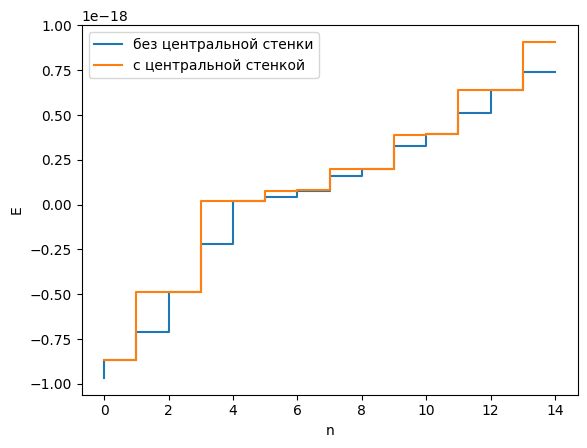

In [190]:
plt.plot(Es[:15], drawstyle='steps-pre', label='без центральной стенки')
plt.plot(Es_with_partition[:15], drawstyle='steps-pre', label='c центральной стенкой')
plt.xlabel("n")
plt.ylabel("E")
plt.legend()
plt.show()